In [1]:
import numpy as np
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import os
import random

In [2]:
def get_images(images_path='create_mole_data/mole_cancer_images/'):
    images_data = []
    
    for image_data in os.listdir(images_path):
        if 'benign' in image_data or 'malignant'in image_data:
            images_data.append(image_data)
        
    return images_data

In [3]:
def one_hot_encoding(image_data):
    if 'benign' in image_data:
        return [1,0]
    else:
        return [0,1]

In [13]:
def create_training_data(images_path='create_mole_data/mole_cancer_images/',limit=None):
    images = []
    labels = []
    images_data = get_images(images_path)
    
    for idx,image_data in enumerate(images_data):
        img_path = images_path + image_data
        img = cv2.imread(img_path,0) #0 for grayscale
        size = 80
        img = cv2.resize(img,(size, size))
        images.append(img)
        labels.append(one_hot_encoding(image_data))
        if limit and idx > limit:
            break
        else:
            if idx % 500 == 0:
                print(idx)
    
    return images,labels
    

In [14]:
images,labels = create_training_data(limit=50)

0


In [15]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html
# np.save('images.npy',images)
# np.save('labels.npy',labels)
#np.load('images.npy') to load

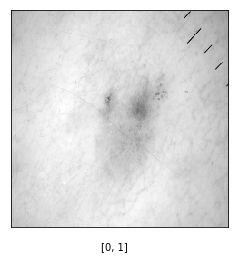

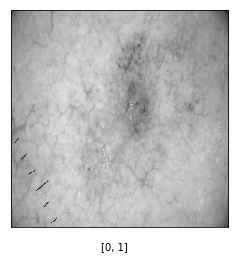

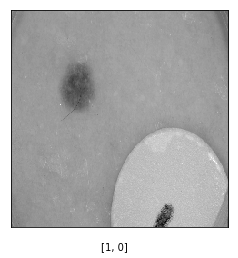

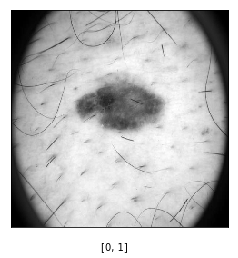

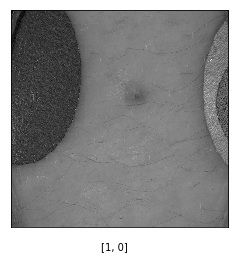

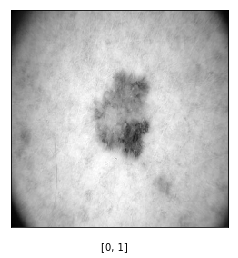

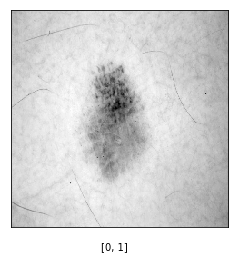

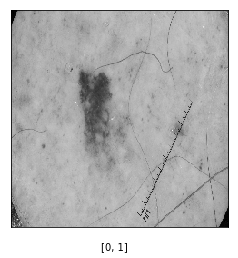

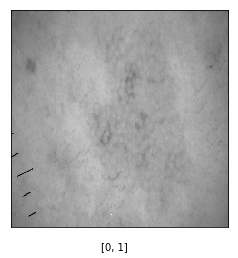

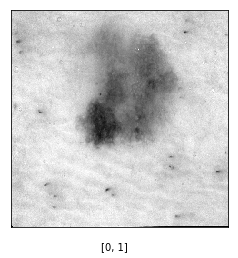

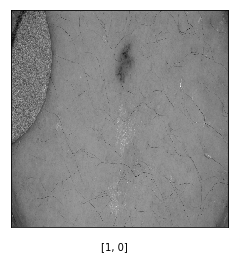

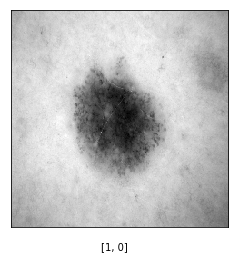

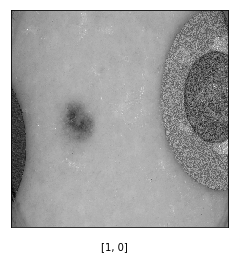

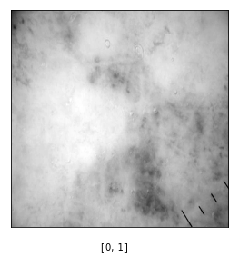

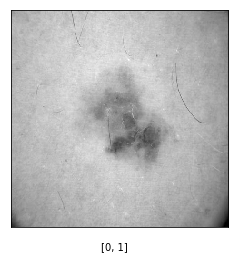

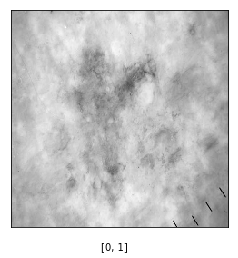

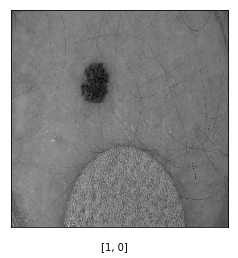

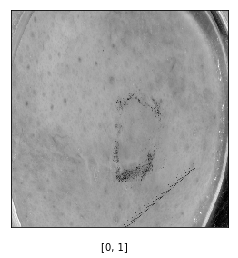

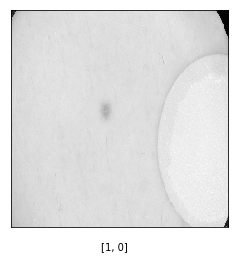

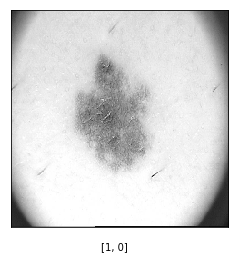

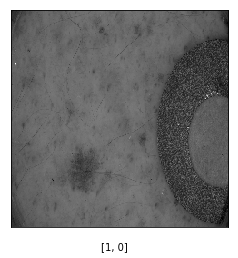

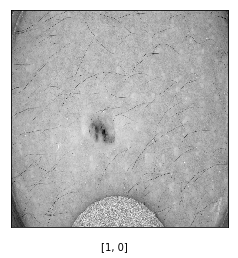

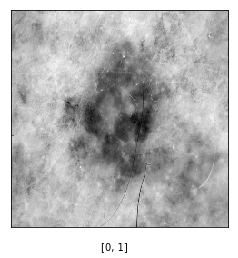

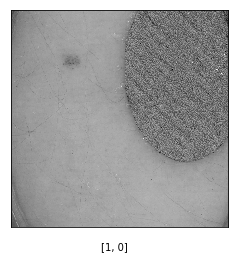

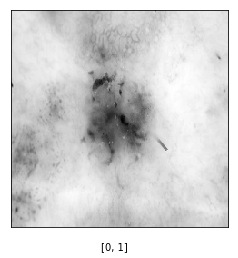

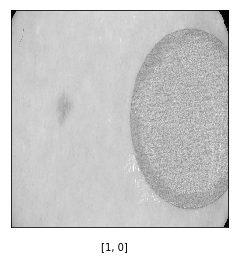

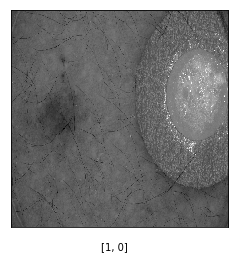

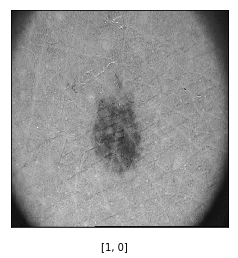

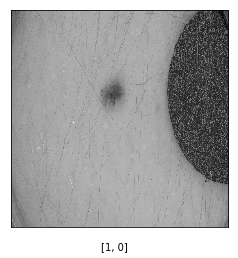

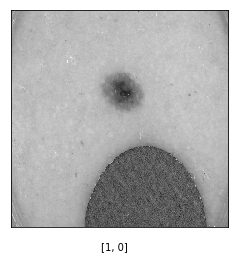

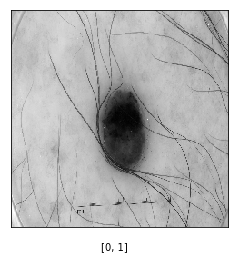

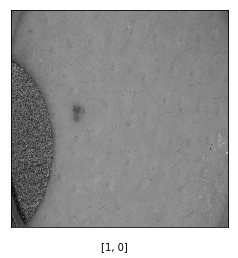

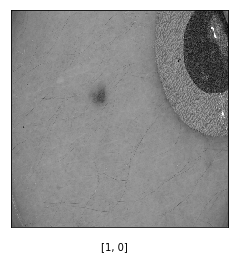

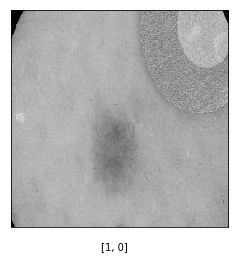

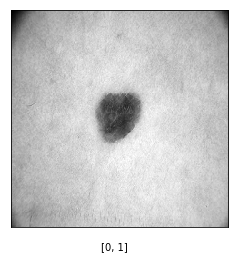

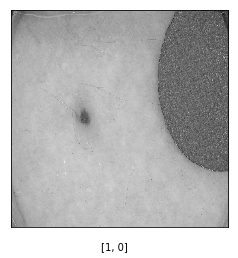

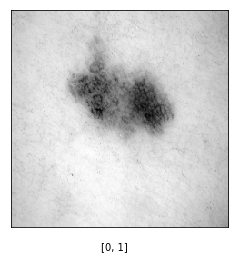

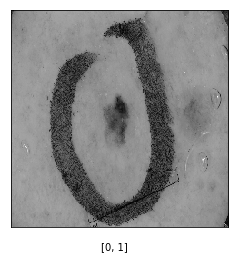

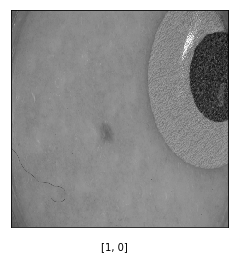

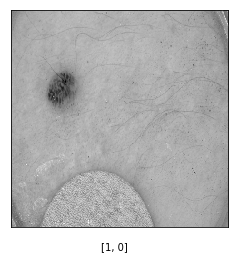

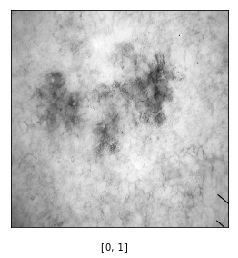

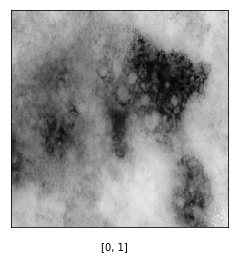

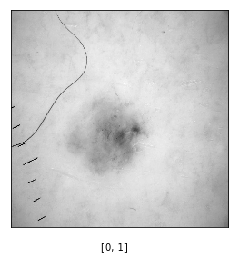

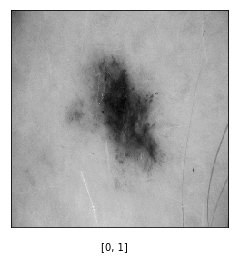

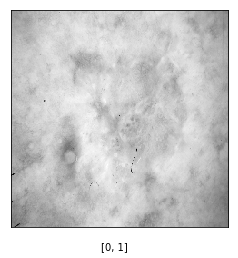

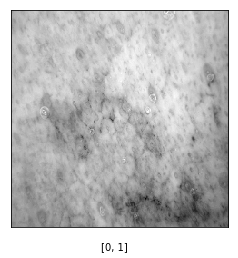

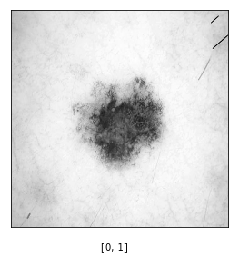

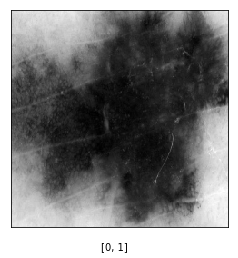

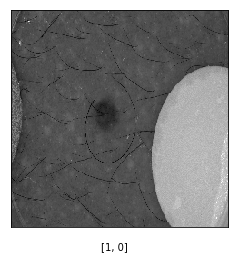

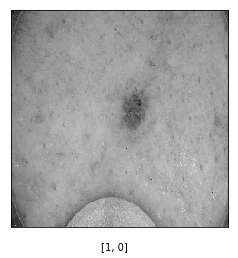

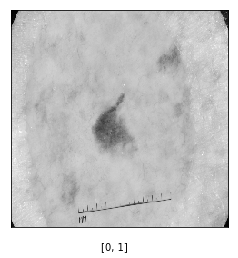

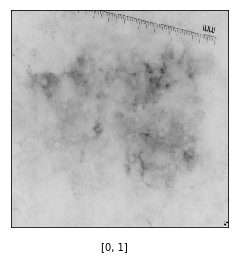

In [16]:
# Image.open(img_path)
for idx,image in enumerate(images):
    fig = plt.figure()
    plt.imshow(image,cmap='gray')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    fig.text(.5, .05, labels[idx], ha='center')
    plt.show()